(1192, 1192)


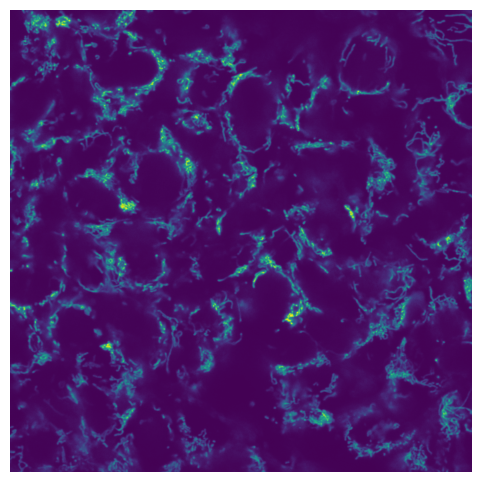

In [1]:
import skimage
import czifile
import numpy as np
import matplotlib.pyplot as plt

# read the single example image
image_path = r'images\ADAM_01.czi'
image = czifile.imread(image_path)
image = np.squeeze(image)

image_path_2 = r''

print(image.shape)

fig, ax = plt.subplots(figsize=(6, 6))
plt.axis("off")
ax.imshow(image)
plt.savefig("raw_tmrm.png")
plt.show()

Methods for image adjustment

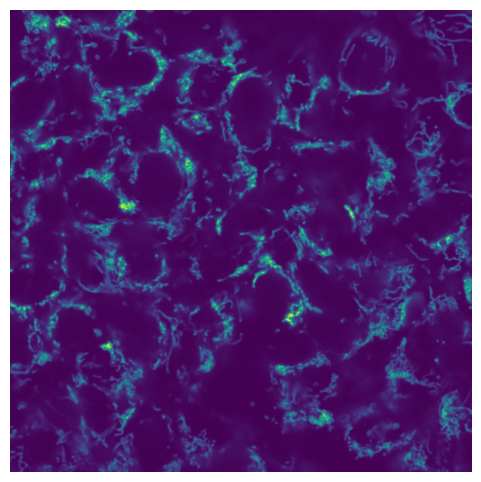

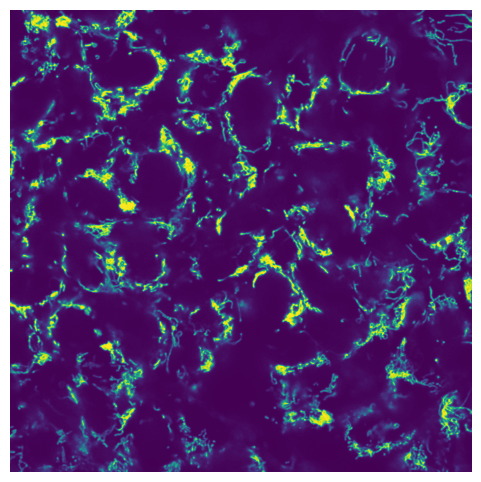

In [67]:
# apply gaussian blur to smooth lines

image_gauss = skimage.filters.gaussian(image)

fig, ax = plt.subplots(figsize=(6, 6))
plt.axis('off')
ax.imshow(image_gauss)
plt.savefig("filtered_tmrm.png")
plt.show()


# adjust with the sigmoid method
c_a_sigmoid = skimage.exposure.adjust_sigmoid(image, cutoff=0.25)
fig, ax = plt.subplots(figsize=(6, 6))
plt.axis('off')
ax.imshow(c_a_sigmoid)
plt.savefig("adjusted_tmrm.png")
plt.show()

Generate mask with otsu

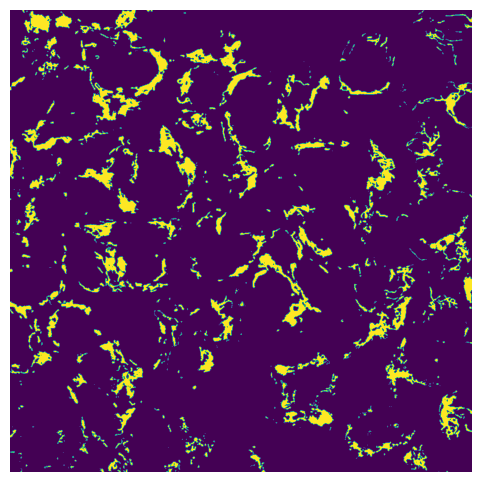

In [63]:
# otsu thresholding (more dynamic)
threshold_otsu = skimage.filters.threshold_otsu(c_a_sigmoid)

otsu_mask = c_a_sigmoid > threshold_otsu

fig, ax = plt.subplots(figsize=(6, 6))
plt.axis('off')
ax.imshow(otsu_mask)
plt.savefig("mask_tmrm.png")
plt.show()


Example for how the mask is used to index only specific pixels when taking a measurement

In [8]:
mfi = np.mean(image[otsu_mask > 0])
print(mfi)

23828.162254706374


Optional Cellpose intracellular segmentation

In [19]:
# import cellpose
from cellpose import models, utils, io
# load the model
model = models.Cellpose(gpu=False, model_type='cyto')
